In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist


Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() ＃真正的data會花很久的時間！搜集資料

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
x_train[1234].shape

(28, 28)

In [0]:
# CNN 要的是 (28, 28, 1)

In [0]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [7]:
y_train[1234]


3

In [0]:
from keras.utils import np_utils

In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [10]:
y_train[1234]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
x_train = x_train/255
x_test = x_test/255


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

In [13]:
model = Sequential()

In [0]:
model.add(Conv2D(4, (3, 3), padding='same', input_shape=(28, 28, 1),
                activation='relu'))

* 3次conv, 3次 max  
* 2 Dense 
* output: 10 

Fliter 大小 3x3
maxpooling 2x3

* Conv01: 4
* Conv02: 8
* Conv01: 16

* 17
* 33


In [16]:
model.add(MaxPool2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(8, (3, 3), padding='same',
                activation='relu'))

In [0]:
model.add(MaxPool2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(16, (3, 3), padding='same',
                activation='relu'))

In [0]:
model.add(MaxPool2D(pool_size=(2,2)))

In [0]:
model.add(Flatten())
model.add(Dense(17, activation='relu'))


In [0]:
model.add(Dense(10, activation='softmax'))

In [24]:
model.compile(loss='mse', optimizer=SGD(lr=0.07), metrics=['accuracy'])


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 4)         148       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 8)         296       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 16)          3216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 16)         

In [27]:
model.fit(x_train, y_train, batch_size=100, epochs=10)




Epoch 1/10





60000/60000 [==============================] - 56s 939us/step - loss: 0.0900 - acc: 0.1086
Epoch 2/10
60000/60000 [==============================] - 55s 923us/step - loss: 0.0899 - acc: 0.1957
Epoch 3/10
60000/60000 [==============================] - 56s 932us/step - loss: 0.0897 - acc: 0.2662
Epoch 4/10
60000/60000 [==============================] - 56s 928us/step - loss: 0.0894 - acc: 0.3057
Epoch 5/10
60000/60000 [==============================] - 56s 928us/step - loss: 0.0882 - acc: 0.3610
Epoch 6/10
60000/60000 [==============================] - 56s 935us/step - loss: 0.0671 - acc: 0.5258
Epoch 7/10
60000/60000 [==============================] - 55s 920us/step - loss: 0.0324 - acc: 0.7761
Epoch 8/10
60000/60000 [==============================] - 55s 917us/step - loss: 0.0252 - acc: 0.8283
Epoch 9/10
60000/60000 [==============================] - 55s 921us/step - loss: 0.0223 - acc: 0.8466
Epoch 10/10
60000/60000 [==============================] - 55s 918us/step 

In [28]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 5s 482us/step


In [29]:
print(f'測試資料的 loss: {score[0]:.5f}')
print(f'測試資料的正確率: {score[1]}')

測試資料的 loss: 0.01186
測試資料的正確率: 0.9234


In [0]:
model.save('myCNNmodel.h5')

In [0]:
from keras.models import load_model

In [0]:
model = load_model('myCNNmodel.h5')

In [0]:
predict = model.predict_classes(x_test)

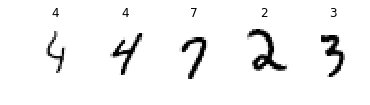

In [36]:
pick = np.random.randint(1,9999, 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")